In [1]:
import os
import cv2

In [2]:
categories=os.listdir(os.path.join(os.getcwd(), 'data'))

In [3]:
import numpy as np

In [4]:
from tqdm import tqdm

data=[]

for category in categories:
    for file in tqdm(os.listdir(os.path.join(os.path.join(os.getcwd(), 'data'), category))):
        path=os.path.join(os.path.join(os.path.join(os.getcwd(), 'data'), category), file)

        img=cv2.imread(path)
        img=cv2.resize(img, (224, 224))

        data.append([img, category])

100%|██████████| 3725/3725 [00:10<00:00, 364.49it/s]


In [5]:
print(len(data))
print(categories)

7553
['without_mask', 'with_mask']


In [6]:
import random 
random.shuffle(data)

In [7]:
X=[]
y=[]

for image, label in tqdm(data):
    X.append(image)

    if label==categories[0]:
        y.append(0)
    else:
        y.append(1)

X=np.array(X, dtype='float32')
y=np.array(y, dtype='int8')

print(X.shape, y.shape)

100%|██████████| 7553/7553 [00:00<00:00, 1886138.25it/s]


(7553, 224, 224, 3) (7553,)


In [8]:
X=X/255

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [10]:
del X, y

In [11]:
from keras.applications.vgg16 import VGG16
vgg= VGG16()

In [12]:
from keras import Sequential
from keras.layers import Dense

model=Sequential()
for layer in vgg.layers[:-1]:
    model.add(layer)

In [13]:
for layer in model.layers:
    layer.trainable=False

model.add(Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,264,641 (512.18 MB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6042, 224, 224, 3) (6042,)
(1511, 224, 224, 3) (1511,)


In [17]:
model.fit(X_train, y_train, epochs=5, validation_data=[X_test, y_test])

Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.7077 - loss: 0.5987 - val_accuracy: 0.8987 - val_loss: 0.2922
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.9021 - loss: 0.2860 - val_accuracy: 0.9252 - val_loss: 0.2169
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.9107 - loss: 0.2390 - val_accuracy: 0.9378 - val_loss: 0.2019
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.9333 - loss: 0.1968 - val_accuracy: 0.9365 - val_loss: 0.1760
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.9373 - loss: 0.1763 - val_accuracy: 0.9510 - val_loss: 0.1549


In [ ]:
def detect_mask(img: np.ndarray):
    return model.predict(img.reshape(1,224,224,3))

detect_mask(X_test[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


array([[0.45760787]], dtype=float32)

In [19]:
model.predict(X_test[1].reshape(1,224,224,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[0.45760787]], dtype=float32)

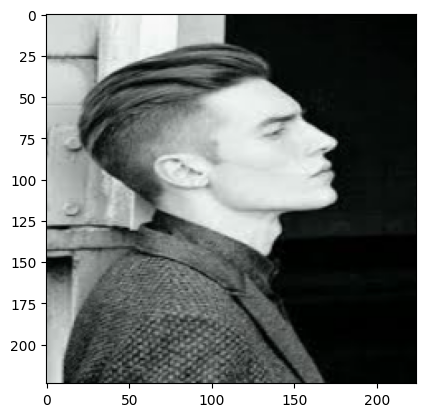

In [20]:
import matplotlib.pyplot as plt
plt.imshow(X_test[1])

In [22]:
import pickle 
pickle.dump(model, open('model.pkl', 'wb'))